In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("https://raw.githubusercontent.com/itsguptaaman/Datasets/main/cleaned_with_best_features.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/itsguptaaman/Datasets/main/test_data.csv")

In [3]:
X_train=df1.drop(columns="class")
Y_train=df1["class"]

In [4]:
X_train.shape, Y_train.shape

((60000, 12), (60000,))

In [5]:
x_test=df2.drop(columns="class")
y_test=df2["class"]

In [6]:
x_test.shape, y_test.shape

((16000, 12), (16000,))

In [7]:
X_train.sample(5)

,az_000,az_002,cs_001,ai_000,ba_008,cn_000,cn_008,ag_001,ed_000,dd_000,ec_00,ba_009
470,3750.0,4666.0,758.0,0.0,134456.0,0.0,1754.0,0.0,1690.0,3460.0,15.92,49126.0
10098,1098.0,82.0,26.0,0.0,292.0,0.0,0.0,0.0,46.0,160.0,2850.16,28.0
49174,502.0,280.0,96.0,0.0,4.0,0.0,54.0,0.0,280.0,312.0,299.66,0.0
32458,40.0,14.0,6.0,0.0,4.0,0.0,0.0,0.0,32.0,54.0,29.28,0.0
32915,166.0,388.0,40.0,0.0,120.0,0.0,0.0,0.0,100.0,212.0,1.46,212.0


In [8]:
x_test.sample(5)

,az_000,az_002,cs_001,ai_000,ba_008,cn_000,cn_008,ag_001,ed_000,dd_000,ec_00,ba_009
14718,3416.0,1970.0,478.0,0.0,32.0,0.0,9370.0,0.0,1218.0,2700.0,1104.80,0.0
14210,5186.0,3878.0,656.0,0.0,0.0,0.0,5054.0,0.0,1796.0,2618.0,1758.70,0.0
12312,10702.0,8054.0,1122.0,0.0,160678.0,2348.0,2522.0,0.0,122.0,2654.0,3667.38,161918.0
6255,2740.0,1570.0,874.0,0.0,270292.0,0.0,6006.0,0.0,1970.0,3420.0,1831.84,5962.0
3262,33010.0,30800.0,4350.0,0.0,176594.0,0.0,235404.0,0.0,9714.0,18002.0,9772.16,556596.0


In [9]:
# Handeling imballenced dataset 

In [10]:
smote=SMOTE()

In [11]:
x_train,y_train=smote.fit_resample(X_train,Y_train)

In [12]:
# Scaling the data

In [13]:
scale=StandardScaler()

In [14]:
scale.fit(x_train,y_train)

StandardScaler()

In [15]:
x_train_scaled=pd.DataFrame(scale.transform(x_train), columns=x_train.columns)

In [16]:
x_test_scaled=pd.DataFrame(scale.transform(x_test), columns=x_test.columns)

In [17]:
# Logistic Regression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
lr_pred=lr.predict(x_test_scaled)

In [23]:
def model_evaluation(y_test,y_predict):
    from sklearn.metrics import confusion_matrix, roc_auc_score
    # t : True, f : False, n : Negative, p : Positive
    # .ravel will give ndarray in 1d array 
    tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    recall = (tp)/(tp+fn)
    precision = (tp)/(tp+fp)
    f1 = ( 2 * ( precision * recall ) / ( precision + recall ) )
    specificity = (tn)/(tn+fp)
    roc_auc=roc_auc_score(y_test,y_predict)
    results = {"Accuracy":accuracy,"Recall" : recall, "Precision" : precision,"F1" : f1,
              "Specificity" : specificity, "Roc_Auc_Score":roc_auc}
    return results

In [ ]:
model_evaluation(y_test,lr_pred)

{'Accuracy': 0.954375,
 'Recall': 0.8613333333333333,
 'Precision': 0.3226773226773227,
 'F1': 0.4694767441860465,
 'Specificity': 0.956608,
 'Roc_Auc_Score': 0.9089706666666666}

In [ ]:
# Decision Tree 

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred=dt.predict(x_test)

In [ ]:
model_evaluation(y_test,dt_pred)

{'Accuracy': 0.9716875,
 'Recall': 0.688,
 'Precision': 0.43434343434343436,
 'F1': 0.5325077399380804,
 'Specificity': 0.978496,
 'Roc_Auc_Score': 0.833248}

In [ ]:
# Post Pruning

In [ ]:
path=dt.cost_complexity_pruning_path(x_train_scaled,y_train)
ccp_alpha=path['ccp_alphas']
dt_model=[]
for ccp in ccp_alpha:
    dt=DecisionTreeClassifier(ccp_alpha=ccp)
    dt.fit(x_train_scaled,y_train)
    dt_model.append(dt)
train_score=[i.score(x_train_scaled,y_train) for i in dt_model]
test_score=[i.score(x_test,y_test) for i in dt_model]

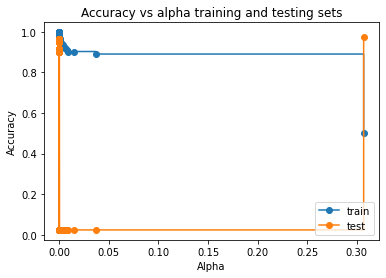

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",drawstyle="steps-post")
ax.legend()

In [ ]:
dt=DecisionTreeClassifier(ccp_alpha=0.05)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05)

In [ ]:
dt_pred=dt.predict(x_test)

In [ ]:
model_evaluation(y_test,dt_pred)

{'Accuracy': 0.922625,
 'Recall': 0.8506666666666667,
 'Precision': 0.21252498334443704,
 'F1': 0.34008528784648184,
 'Specificity': 0.924352,
 'Roc_Auc_Score': 0.8875093333333333}

In [ ]:
# Hyper parameter tuning

In [ ]:
param={
    "criterion":["gini","entropy"],
    "splitter":["best", "random"],
    "max_depth":[6,9,12,15,17,20],
    "min_samples_split":[6,9,12],
    "min_samples_leaf":[6,9,12]
}

In [ ]:
rscv=RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param, cv=15)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=15, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 9, 12, 15, 17, 20],
                                        'min_samples_leaf': [6, 9, 12],
                                        'min_samples_split': [6, 9, 12],
                                        'splitter': ['best', 'random']})

In [ ]:
rscv.best_estimator_

DecisionTreeClassifier(max_depth=17, min_samples_leaf=6, min_samples_split=12)

In [ ]:
dt=DecisionTreeClassifier(max_depth=17, min_samples_leaf=6, min_samples_split=12,ccp_alpha=0.05)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, max_depth=17, min_samples_leaf=6,
                       min_samples_split=12)

In [ ]:
model_evaluation(y_test,dt_pred)

{'Accuracy': 0.922625,
 'Recall': 0.8506666666666667,
 'Precision': 0.21252498334443704,
 'F1': 0.34008528784648184,
 'Specificity': 0.924352,
 'Roc_Auc_Score': 0.8875093333333333}

In [ ]:
# Ranom forest

In [ ]:
rf=RandomForestClassifier(oob_score=True)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
rf_pred=rf.predict(x_test)

In [ ]:
model_evaluation(y_test,rf_pred)

{'Accuracy': 0.97775,
 'Recall': 0.7413333333333333,
 'Precision': 0.5176908752327747,
 'F1': 0.6096491228070176,
 'Specificity': 0.983424,
 'Roc_Auc_Score': 0.8623786666666666}

In [ ]:
# Hyper parameter tuning

In [ ]:
param={
    "n_estimators":[100,110,120,130,140,150],
    "criterion":["gini","entropy"],
    "max_depth":[1,4,6,9,12,15,17,20],
    "min_samples_split":[1,4,6,9,12,15,17,20],
    "min_samples_leaf":[1,4,6,9,12,15,17,20]
}

In [ ]:
rscv=RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param, cv=15)
rscv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 4, 6, 9, 12, 15, 17,
                                                      20],
                                        'min_samples_leaf': [1, 4, 6, 9, 12, 15,
                                                             17, 20],
                                        'min_samples_split': [1, 4, 6, 9, 12,
                                                              15, 17, 20],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150]})

In [ ]:
rscv.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=140)

In [18]:
rf=RandomForestClassifier(oob_score=True,max_depth=20, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=140)

In [19]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=140, oob_score=True)

In [20]:
rf_pred=rf.predict(x_test)

In [24]:
model_evaluation(y_test,rf_pred)

{'Accuracy': 0.971875,
 'Recall': 0.832,
 'Precision': 0.44635193133047213,
 'F1': 0.5810055865921787,
 'Specificity': 0.975232,
 'Roc_Auc_Score': 0.903616}

In [ ]:
# Support Vector

In [ ]:
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
svc_pred=svc.predict(x_test)

In [ ]:
model_evaluation(y_test,svc_pred)

{'Accuracy': 0.94175,
 'Recall': 0.896,
 'Precision': 0.27339300244100895,
 'F1': 0.4189526184538653,
 'Specificity': 0.942848,
 'Roc_Auc_Score': 0.919424}

In [ ]:
# Hyper parameter tuning

In [17]:
param={
    "C":[1,2,3],
    "kernel":[ 'poly', 'rbf', 'sigmoid'],
    "gamma":[0.001,0.01,0.1,0.2,],
    "coef0":[0.0,0.1,0.2],
    "shrinking":[False,True],
    "tol":[0.0001,0.001,0.002,],
    "cache_size":[300,400,500]
}

In [ ]:
# rscv=RandomizedSearchCV(estimator=SVC(), param_distributions=param, cv=15)
# rscv.fit(x_train,y_train)

In [ ]:
rscv.best_estimator_

In [ ]:
# Ada Boost

In [ ]:
ada=AdaBoostClassifier()

In [ ]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
ada_pred=ada.predict(x_test)

In [ ]:
model_evaluation(y_test,ada_pred)

{'Accuracy': 0.9475,
 'Recall': 0.8853333333333333,
 'Precision': 0.2940655447298494,
 'F1': 0.44148936170212766,
 'Specificity': 0.948992,
 'Roc_Auc_Score': 0.9171626666666667}

In [ ]:
# Hyper Parameter Tuning

In [ ]:
param={
    "n_estimators":[50,60,70,80,90,100,120],
    "learning_rate":[0.0001,0.001,0.01,0.1,1.0,2,3,4,5]
}

In [ ]:
rscv=RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=param, cv=15)
rscv.fit(x_train,y_train)

In [ ]:
rscv.best_estimator_

In [ ]:
# Gradient Boosting

In [ ]:
gb=GradientBoostingClassifier()

In [ ]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_pred=gb.predict(x_test)

In [ ]:
model_evaluation(y_test,gb_pred)

{'Accuracy': 0.9555,
 'Recall': 0.9013333333333333,
 'Precision': 0.3336623889437315,
 'F1': 0.48703170028818443,
 'Specificity': 0.9568,
 'Roc_Auc_Score': 0.9290666666666666}

In [ ]:
# Hyper parameter tuning

In [ ]:
param={
    "loss":['log_loss','deviance', 'exponential'],
    "learning_rate":[0.0001,0.001,0.01,0.1,1.0,2,3,4,5],
    "n_estimators":[50,60,70,80,90,100,120],
    "criterion":['friedman_mse','squared_error'],
    "min_samples_split":[2,4,6,9,12,15],
    "min_samples_leaf":[1,4,6,9,12,15],
    "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3],
    "max_depth":[3,5,7,9,11]
}

In [1]:
# rscv=RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param, cv=15)
# rscv.fit(x_train,y_train)

In [ ]:
rscv.best_estimator_

In [ ]:
vc=VotingClassifier([('lr', LogisticRegression(max_iter=5000)), ('gb', gb), ('ada', ada),('rf',rf)],voting="soft")

In [ ]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=5000)),
                             ('gb', GradientBoostingClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier(oob_score=True))],
                 voting='soft')

In [ ]:
vc_pred=vc.predict(x_test)

In [ ]:
model_evaluation(y_test, vc_pred)

{'Accuracy': 0.9625625,
 'Recall': 0.888,
 'Precision': 0.3741573033707865,
 'F1': 0.5264822134387352,
 'Specificity': 0.964352,
 'Roc_Auc_Score': 0.9261759999999999}